In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt

In [23]:
train = pd.read_csv('clinical_train.csv')
x_train = train.drop(['PATIENT_ID', 'Y_label'], axis = 1)
y_train = train['Y_label']

In [24]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=1)

In [25]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [26]:
pls.fit(x_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)

In [27]:
test = pd.read_csv('clinical_test.csv')

In [28]:
x_test = test.drop(['PATIENT_ID', 'Y_label'], axis = 1)
y_test = test['Y_label']
x_test = np.array(x_test)

In [29]:
pred=pls.predict(x_test)

In [30]:
realPred = []
for ele in pred:
    if ele > 0.5:
        realPred.append(1)
    else:
        realPred.append(0)

In [31]:
print("Accuracy for PLS on CV data: ",accuracy_score(y_test,realPred))

Accuracy for PLS on CV data:  0.8025


In [33]:
print("F1 for Random Forest on CV data: ",f1_score(y_test,realPred))

F1 for Random Forest on CV data:  0.5433526011560694


In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision for Random Forest on CV data: ",precision_score(y_test,realPred))
print("Recall for Random Forest on CV data: ",recall_score(y_test,realPred))

Precision for Random Forest on CV data:  0.618421052631579
Recall for Random Forest on CV data:  0.4845360824742268


In [36]:
def plot_AUC_ROC(y_test, y_score):
    fpr,tpr,threshold = roc_curve(y_test, y_score) 
    roc_auc = auc(fpr,tpr) 

    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 432x288 with 0 Axes>

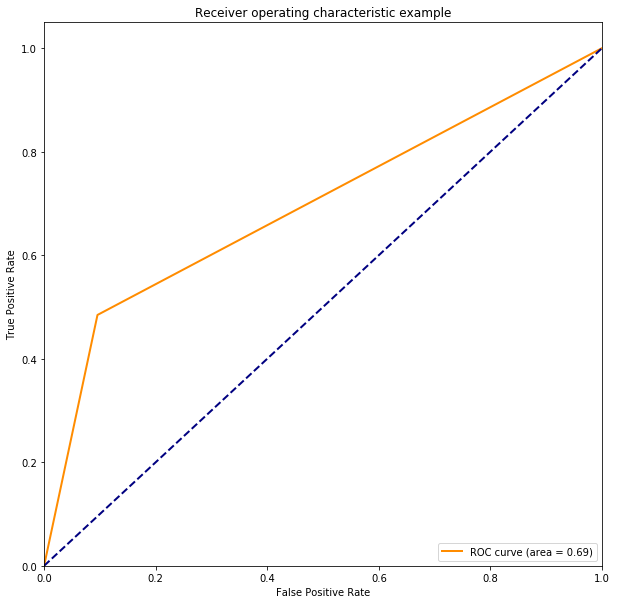

In [37]:
plot_AUC_ROC(y_test, realPred)

In [71]:
def read_file(path):
#     df = pd.read_csv(path,delimiter = '\t',skiprows = [0,1,2,3])
    df = pd.read_csv(path,delimiter = ',')
    return df

In [72]:
expression_train = read_file("expression_data_train.csv")
expression_test = read_file("expression_test.csv")
X = expression_train.iloc[:,0:24368].values
y = expression_train[['Y_label']].values
X_test = expression_test.iloc[:,0:24368].values
y_test = expression_test[['Y_label']].values
y = np.squeeze(y)
y_test = np.squeeze(y_test)

In [73]:
from ReliefF import ReliefF
fs = ReliefF(n_neighbors=10, n_features_to_keep=1500)
X = fs.fit_transform(X, y)
# X_train = fs.fit_transform(X_train)
# X_test_subset = fs.transform(X_test)
print(X.shape, y.shape)

(1122, 1500) (1122,)


In [74]:
Xtest_subset  = fs.transform(X_test)

In [75]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=1)

In [76]:
pls.fit(X, y)

PLSRegression(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)

In [59]:
pred=pls.predict(Xtest_subset)

In [70]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='auto').fit(X, y)
clf.predict(X)

pred= clf.predict_proba(X[:2, :]) 
print(pred)

[[9.81796729e-01 1.82032562e-02 1.44268498e-08]
 [9.71724746e-01 2.82752243e-02 3.01656728e-08]]


/Users/Bill7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [60]:
realPred = []
for ele in pred:
    if ele > 0.5:
        realPred.append(1)
    else:
        realPred.append(0)

In [61]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,realPred))

Accuracy for Random Forest on CV data:  0.7107142857142857


In [62]:
print("F1 for Random Forest on CV data: ",f1_score(y_test,realPred))

F1 for Random Forest on CV data:  0.537142857142857


In [63]:
print("F1 for Random Forest on CV data: ",precision_score(y_test,realPred))

F1 for Random Forest on CV data:  0.573170731707317


In [64]:
print("F1 for Random Forest on CV data: ",recall_score(y_test,realPred))

F1 for Random Forest on CV data:  0.5053763440860215


<Figure size 432x288 with 0 Axes>

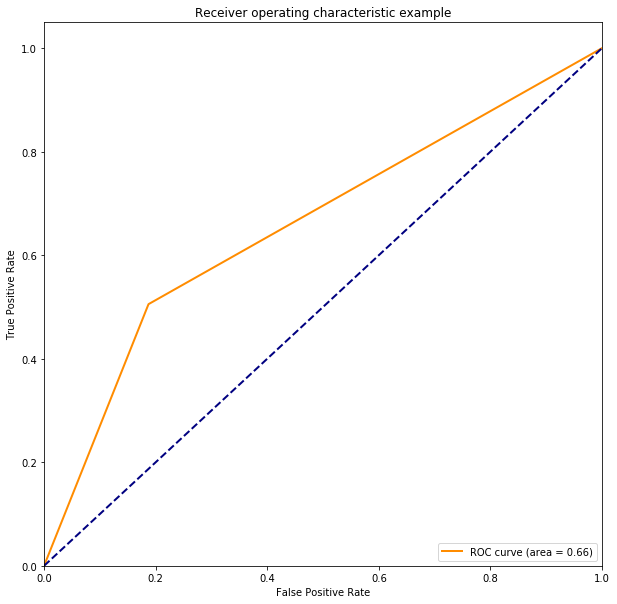

In [65]:
plot_AUC_ROC(y_test, realPred)

In [67]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, realPred, pos_label=2)

/Users/Bill7/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])